# 4.10 Coding Etiquette & Excel Reporting

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\avadr\27-01-2020 Instacart Basket Analysis'

In [3]:
# Importing data set from pickle format
excl = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excl.pkl'))

In [4]:
excl['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [5]:
# Fixing formatting to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Step 5 and 6

## Creating income category

In [6]:
excl['income'].describe()

count   30964564.00
mean       99675.87
std        43141.87
min        25903.00
25%        67292.00
50%        96765.00
75%       128102.00
max       593901.00
Name: income, dtype: float64

In [7]:
# Seting the income thresholds for low and high income
low_income_threshold = 50000
high_income_threshold = 100000

In [8]:
# Creating income category column
excl['income_category'] = pd.cut(
    excl['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['low income', 'middle income', 'high income'],
    include_lowest=True)

In [9]:
excl.shape

(30964564, 35)

In [10]:
excl['income_category'].value_counts()

income_category
high income      14207028
middle income    13394982
low income        3362554
Name: count, dtype: int64

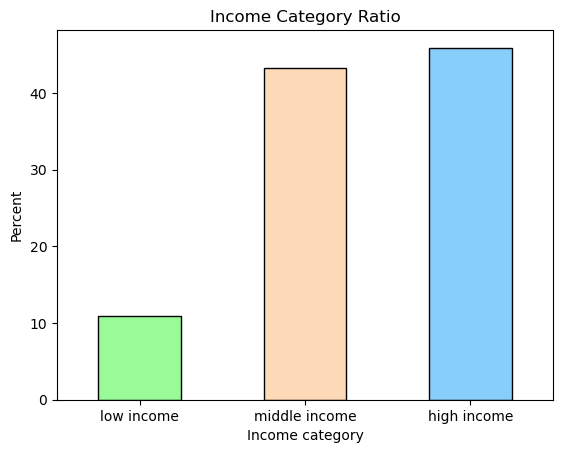

<Figure size 640x480 with 0 Axes>

In [11]:
# Creating Bar Chart for income category
income_category_frequency = (excl['income_category'].value_counts(normalize=True) * 100).sort_index()
income_category_frequency.plot.bar(edgecolor = 'black',color=['palegreen', 'peachpuff', 'lightskyblue'])
plt.xlabel('Income category')
plt.ylabel('Percent')
plt.title('Income Category Ratio')
plt.xticks(rotation=0)
plt.show()
# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_category_frequency_bar.png'))

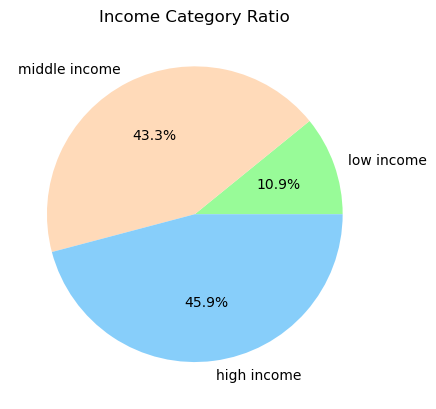

In [12]:
# Creating Pie Chart for income category
pie_income_tier = plt.pie(income_category_frequency, labels=income_category_frequency.index, autopct='%1.1f%%', colors=['palegreen', 'peachpuff', 'lightskyblue'])
plt.title('Income Category Ratio')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_category_frequency_pie.png')) # Save figure
plt.show()

## Creating customer age groups

In [13]:
excl['Age'].describe()

count   30964564.00
mean          49.47
std           18.49
min           18.00
25%           33.00
50%           49.00
75%           65.00
max           81.00
Name: Age, dtype: float64

In [4]:
# Create the age_group column with value as 'Unknown'
excl['age_group'] = 'Unknown'

In [5]:
# Assign age groups
excl.loc[(excl['Age'] >= 18) & (excl['Age'] <= 28), 'age_group'] = 'young adult'
excl.loc[(excl['Age'] >= 29) & (excl['Age'] <= 40), 'age_group'] = 'adult'
excl.loc[(excl['Age'] >= 41) & (excl['Age'] <= 55), 'age_group'] = 'middle-aged'
excl.loc[(excl['Age'] >= 56) & (excl['Age'] <= 70), 'age_group'] = 'senior'
excl.loc[(excl['Age'] >= 71) & (excl['Age'] <= 82), 'age_group'] = 'elderly'

In [ ]:
excl['marital_status_age_group'] = excl['marital_status'] + ', ' + excl['income_category'] + ', ' + excl['dependant_flag']

In [8]:
marital_age = excl.groupby('marital_status', 'age_group')['prices'].value_counts().plot.bar(title = 'Order Days by Loyalty Status', xlabel = 'Day of the Week', ylabel = 'Orders Placed', edgecolor = 'black', color=['peachpuff'] * 7 + ['palegreen'] * 7 + ['lightskyblue'] * 7)
plt.tight_layout()

ValueError: No axis named age_group for object type DataFrame

In [6]:
# Checking output
excl['age_group'].value_counts()

age_group
middle-aged    7307833
senior         7175649
adult          5828121
elderly        5332649
young adult    5320312
Name: count, dtype: int64

In [7]:
# Creating Percentage
age_group_percent = (excl['age_group'].value_counts(normalize=True) * 100).sort_index()

In [18]:
# Check output
age_group_percent

age_group
adult         18.82
elderly       17.22
middle-aged   23.60
senior        23.17
young adult   17.18
Name: proportion, dtype: float64

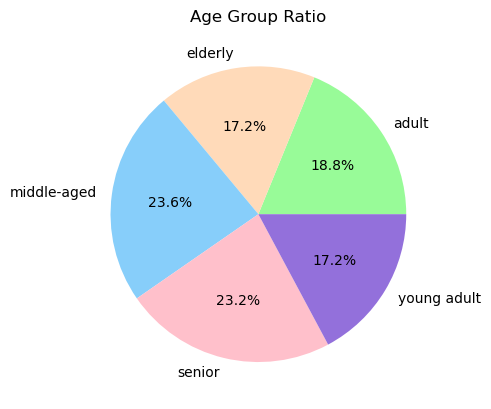

In [19]:
# Create Pie Chart  for age group
age_group_pie = plt.pie(age_group_percent, labels=age_group_percent.index, autopct='%1.1f%%',  colors=['palegreen', 'peachpuff', 'lightskyblue', 'pink', 'mediumpurple'])
plt.title('Age Group Ratio')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_pie.png'))

## Creating dependant flag

In [20]:
# Create flag to identify customers with dependants
excl['dependant_mean'] = excl.groupby(['user_id'])['dependants'].transform('mean')

In [21]:
excl.loc[excl['dependant_mean'] > 0, 'dependant_flag'] = 'with dependants'

In [22]:
excl.loc[excl['dependant_mean'] <= 0, 'dependant_flag'] = 'without dependants'

In [23]:
excl['dependant_flag'].value_counts(dropna = False)

dependant_flag
with dependants       23224883
without dependants     7739681
Name: count, dtype: int64

In [24]:
excl['dependant_flag'].head()

0    with dependants
1    with dependants
2    with dependants
3    with dependants
4    with dependants
Name: dependant_flag, dtype: object

In [25]:
excl.dtypes

product_id                                int64
product_name                             object
department_id                             int64
prices                                  float64
order_id                                  int64
user_id                                   int64
number_of_orders                          int64
orders_day_of_week                        int64
order_hour_of_day                         int64
days_since_prior_order                  float64
add_to_cart_order                         int64
reordered                                 int64
_merge                                 category
price_range_loc                          object
busiest_day                              object
busiest_days                             object
busiest_period_of_day                    object
max_order                                 int64
loyalty_flag                             object
mean_price                              float64
spending_flag                           

In [26]:
# Converting data-type to string
excl['income_category'] = excl['income_category'].astype(str)
excl['dependant_flag'] = excl['dependant_flag'].astype(str)

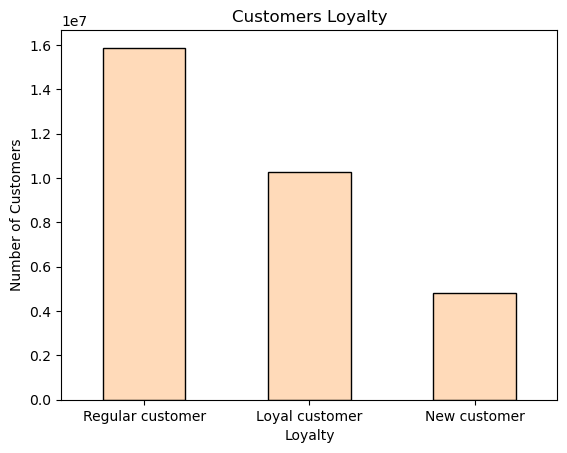

In [27]:
# Creating a bar chart for the loyaltiy and number of orders
bar_orders_loyalty = excl['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Loyalty', ylabel = 'Number of Customers', edgecolor = 'black', color = 'peachpuff')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

## Creating customer profiles

In [28]:
# Creating new column customer_profile 
excl['customer_profile'] = excl['age_group'] + ', ' + excl['income_category'] + ', ' + excl['dependant_flag']

In [29]:
excl['customer_profile'].head()

0    elderly, low income, with dependants
1    elderly, low income, with dependants
2    elderly, low income, with dependants
3    elderly, low income, with dependants
4    elderly, low income, with dependants
Name: customer_profile, dtype: object

In [30]:
excl.shape

(30964564, 39)

In [31]:
excl['customer_profile'].value_counts()

customer_profile
middle-aged, high income, with dependants         3816098
senior, high income, with dependants              3755641
adult, middle income, with dependants             3547780
young adult, middle income, with dependants       3276622
elderly, high income, with dependants             2796708
middle-aged, high income, without dependants      1272045
senior, high income, without dependants           1268959
middle-aged, middle income, with dependants       1201650
adult, middle income, without dependants          1186006
senior, middle income, with dependants            1169033
young adult, middle income, without dependants    1058433
elderly, high income, without dependants           937048
elderly, middle income, with dependants            876092
adult, low income, with dependants                 672063
young adult, low income, with dependants           602084
middle-aged, low income, with dependants           475912
senior, low income, with dependants                4295

In [32]:
excl['customer_profile'].describe()

count                                      30964564
unique                                           30
top       middle-aged, high income, with dependants
freq                                        3816098
Name: customer_profile, dtype: object

## Customer profile sales

In [33]:
# Grouping customer profiles and prices
customer_profile_revenue = excl.groupby('customer_profile')['prices'].sum()

In [34]:
# Sorting values
customer_profile_revenue_sorted = customer_profile_revenue.sort_values(ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

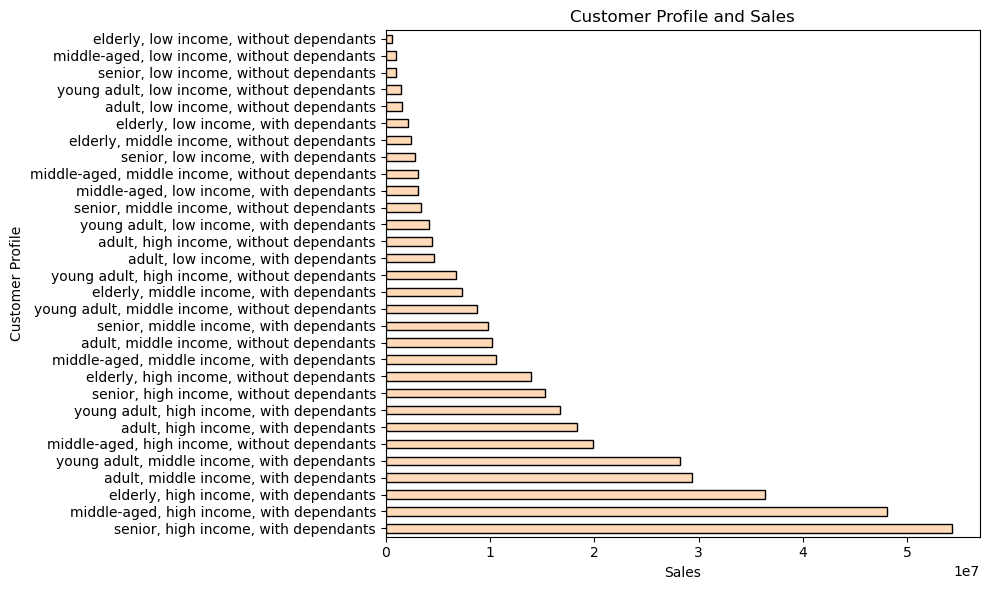

In [35]:
# Creating bar chart for customer profiles and sales
bar_customer_profile = customer_profile_revenue_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', edgecolor = 'black', color = 'peachpuff')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show

In [36]:
# Saving as PNG
bar_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_sales.png'))

## Customer profile order interval

In [37]:
# Grouping customer_profile with days_since_prior_order
customer_profile_order_frequency = excl.groupby('customer_profile')['days_since_prior_order'].mean()

In [38]:
# Sorting values
customer_profile_order_frequency_sorted = customer_profile_order_frequency.sort_values(ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

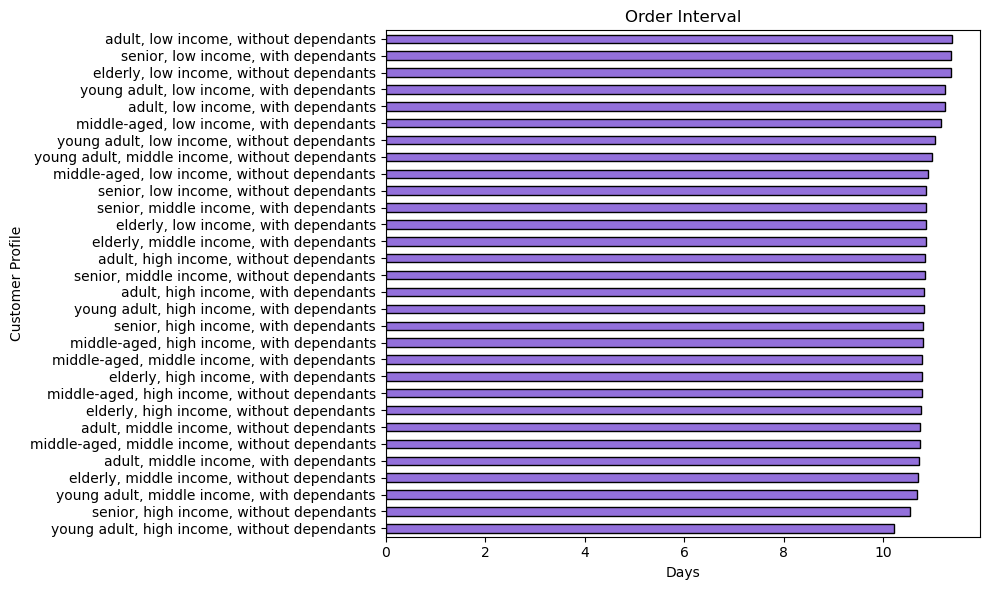

In [39]:
# Creating bar chart for order invervals
bar_customer_profile_order_intervals = customer_profile_order_frequency_sorted.plot.barh(title = 'Order Interval', xlabel = 'Days', ylabel = 'Customer Profile', edgecolor = 'black', color = 'mediumpurple')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show

In [40]:
# Saving as PNG
bar_customer_profile_order_intervals.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_order_intervals.png'))

## Order time among customer profiles

In [41]:
# Group by customer profile and order hour of day
order_hour_day = excl.groupby(['customer_profile', 'order_hour_of_day']).size().unstack()

In [42]:
# Calculating mode 
customer_profile_order_hours_mode = excl.groupby('customer_profile')['order_hour_of_day'].apply(lambda x: x.mode().iloc[0])

In [43]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'customer_profile': customer_profile_order_hours_mode.index, 'customer_profile_order_hours_mode': customer_profile_order_hours_mode.values})

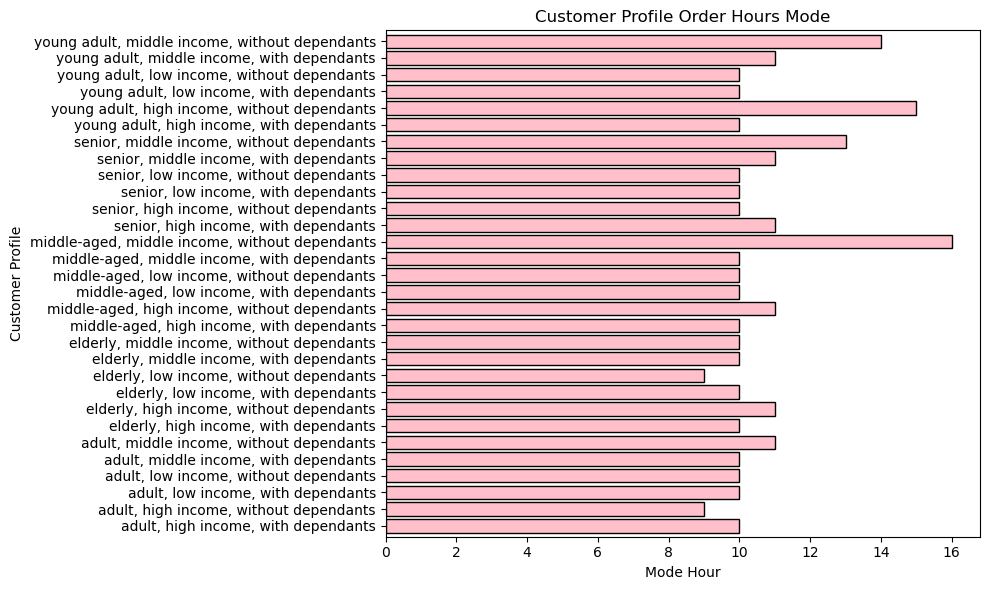

In [44]:
# Creating bar chart for customer profile and order hours
customer_profile_order_hours_mode_bar = plot_data.plot(kind='barh', x='customer_profile', y='customer_profile_order_hours_mode', edgecolor = 'black', color='pink', legend=False, title='Customer Profile Order Hours Mode', xlabel='Mode Hour', ylabel='Customer Profile', width=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()

In [45]:
# Saving as PNG
customer_profile_order_hours_mode_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_order_hours_mode_bar.png'))

## Loayal customers daily orders placed

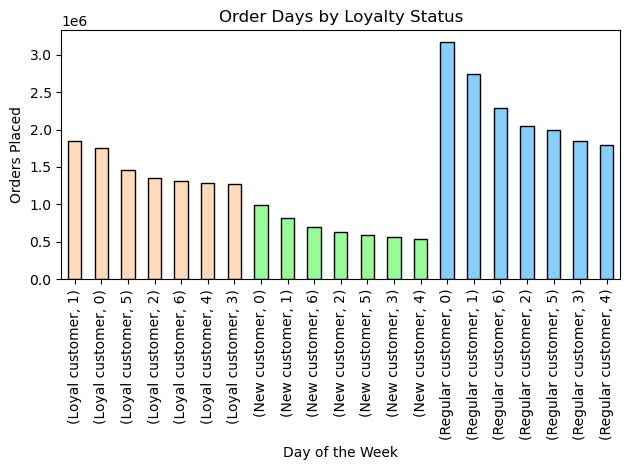

In [46]:
loyalty_day_order_bar = excl.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Order Days by Loyalty Status', xlabel = 'Day of the Week', ylabel = 'Orders Placed', edgecolor = 'black', color=['peachpuff'] * 7 + ['palegreen'] * 7 + ['lightskyblue'] * 7)
plt.tight_layout()

In [47]:
# Saving as PNG
loyalty_day_order_bar .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_day_order_bar .png'))

## Departments and orders

In [48]:
# Maping deparment id to names
department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [49]:
# Create the department name column
excl['department_name'] = excl['department_id'].map(department_mapping).fillna("missing")

In [50]:
excl['department_name'].head()

0          snacks
1          snacks
2    meat seafood
3    meat seafood
4            bulk
Name: department_name, dtype: object

In [51]:
excl.shape

(30964564, 40)

In [52]:
excl['department_name'].value_counts()

department_name
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [53]:
# Grouping department name and loyalty flag
loyal_dept_group = excl.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [54]:
# Sorting values
loyal_dept_group = loyal_dept_group.sort_values(by = 'Regular customer', ascending = False)

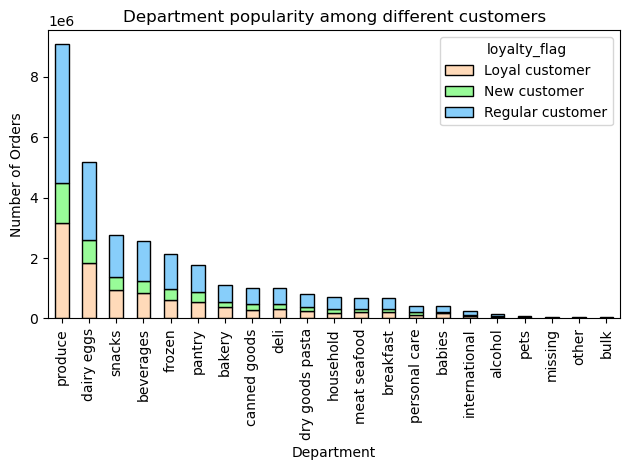

In [55]:
# Creating bar chart 
colors = ['peachpuff', 'palegreen','lightskyblue']
loyal_dept_group = loyal_dept_group.plot(kind = 'bar', stacked = True, edgecolor = 'black', color = colors)
plt.title('Department popularity among different customers')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [56]:
# Saving as PNG
loyal_dept_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_dept_group.png'))

# Step 7

In [57]:
# aggregating customer profile
aggregate_customer_profile = excl.groupby('user_id').agg({
    'Age': ['max', 'mean', 'min'],
    'dependants': ['max', 'mean', 'min']
}).reset_index()

In [58]:
# Renaming Columns
aggregate_customer_profile.columns = ['user_id', 'max_age', 'mean_age', 'min_age', 'max_dependants', 'mean_dependants', 'min_dependants']

In [59]:
# Printing the outputs
print(aggregate_customer_profile)

        user_id  max_age  mean_age  min_age  max_dependants  mean_dependants  \
0             1       31     31.00       31               3             3.00   
1             2       68     68.00       68               3             3.00   
2             3       33     33.00       33               3             3.00   
3             4       31     31.00       31               3             3.00   
4             7       39     39.00       39               2             2.00   
...         ...      ...       ...      ...             ...              ...   
162626   206203       81     81.00       81               3             3.00   
162627   206206       25     25.00       25               2             2.00   
162628   206207       76     76.00       76               1             1.00   
162629   206208       64     64.00       64               1             1.00   
162630   206209       74     74.00       74               3             3.00   

        min_dependants  
0             

# Step 8 and 9

## Comparing department results by region

In [60]:
# Group deparment_name with region
dept_by_region = excl.groupby(['department_name', 'region']).size().unstack()

In [61]:
# Sorting values
dept_by_region = dept_by_region.sort_values(by = 'Midwest', ascending = False)

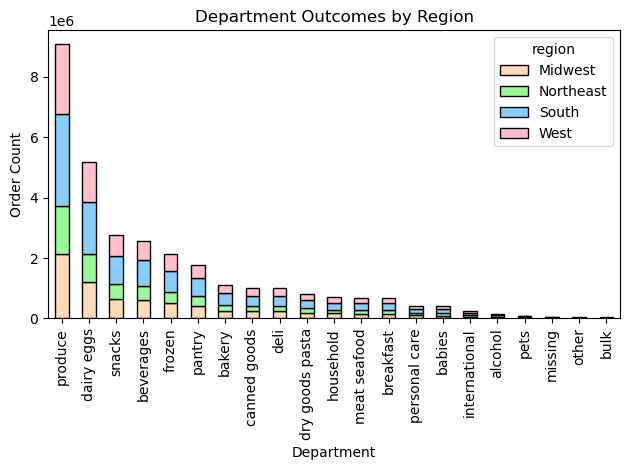

In [62]:
# Creating bar chart
colors = ['peachpuff', 'palegreen','lightskyblue', 'pink']
dept_by_region_bar = dept_by_region.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
plt.title('Department Outcomes by Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

In [63]:
# Saving as PNG
dept_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_by_region_bar.png'))

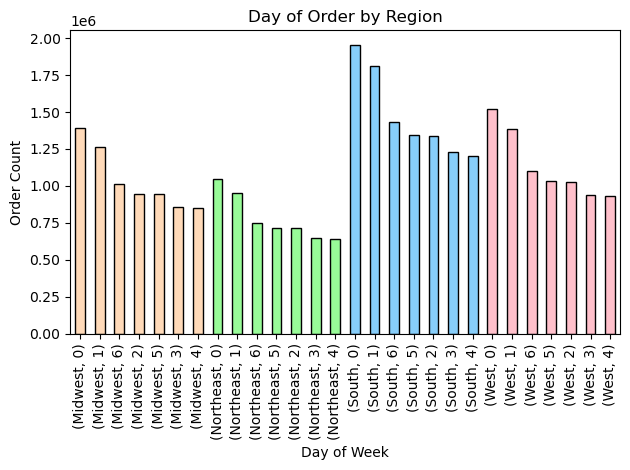

In [64]:
# Plot Bar Chart 
region_order_day_bar = excl.groupby('region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Order by Region', xlabel = 'Day of Week', ylabel = 'Order Count', edgecolor = 'black', color=['peachpuff'] * 7 + ['palegreen'] * 7+['lightskyblue'] * 7 + ['pink'] * 7)
plt.tight_layout()

In [65]:
# Saving as PNG
region_order_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_order_day_bar.png'))

In [66]:
# Creating crosstab
avg_price_by_region = pd.crosstab(index=excl['region'], columns='Average Price', values=excl['prices'], aggfunc='mean')

<function matplotlib.pyplot.show(close=None, block=None)>

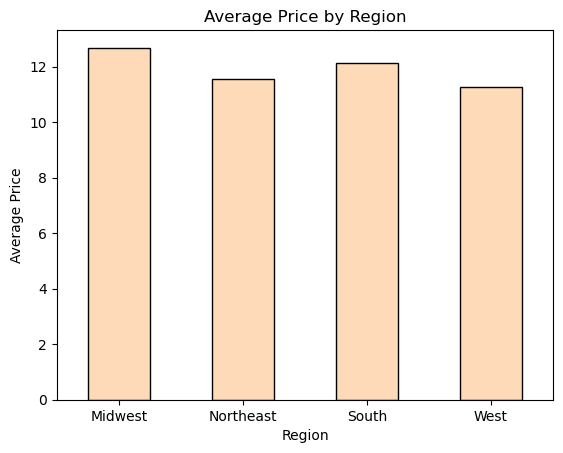

In [67]:
# Creating bar chart
avg_price_by_region_bar = avg_price_by_region.plot(kind='bar', edgecolor = 'black', color='peachpuff', legend=None)
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show

In [68]:
# Saving as PNG
avg_price_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'avg_price_by_region_bar.png'))

## Top 5 departments

In [69]:
# Calculating the counts
department_counts = excl['department_name'].value_counts()

In [70]:
# finding top departments
top_departments = department_counts.head(5).index

In [71]:
# Grouping deparments
excl['department_grouped'] = excl['department_name'].where(excl['department_name'].isin(top_departments))

In [72]:
# Calculating the presentage 
department_percentage = excl['department_grouped'].value_counts(normalize=True) * 100

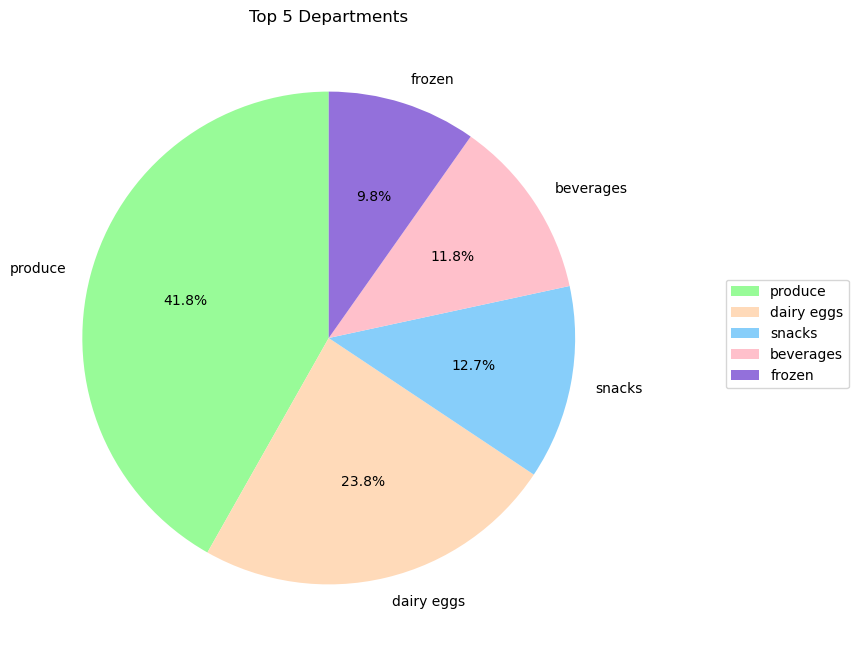

In [73]:
# Creating and saving the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=['palegreen', 'peachpuff', 'lightskyblue', 'pink', 'mediumpurple'])

ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.title('Top 5 Departments', )
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_pie_chart.png')
plt.savefig(save_path)
plt.show()

In [74]:
# Exporting dataset as pickle format
excl.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excl1.pkl'))